# Step 1: Setting Up Your SQLite Database


In [1]:
import sqlite3

# Create a connection object to the database
conn = sqlite3.connect('superhero_db.sqlite')

# Create a cursor object using the connection
cursor = conn.cursor()

In [2]:
# Create the tables
ddl_statements = """
-- Heroes table
CREATE TABLE heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT,
    team TEXT
);

-- Villains table
CREATE TABLE villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT
);

-- Battles table
CREATE TABLE battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT,
    FOREIGN KEY (hero_id) REFERENCES heroes(id),
    FOREIGN KEY (villain_id) REFERENCES villains(id)
);
"""

In [3]:
cursor.executescript(ddl_statements)
conn.commit()

# Step 2: Import Data from CSV Files

In [4]:
import pandas as pd

# Upload CSVs to Colab
heroes_df = pd.read_csv('heroes.csv')
heroes_df.to_sql('heroes', conn, if_exists='append', index=False)

villains_df = pd.read_csv('villains.csv')
villains_df.to_sql('villains', conn, if_exists='append', index=False)

battles_df = pd.read_csv('battles.csv')
battles_df.to_sql('battles', conn, if_exists='append', index=False)

# Verify data insertion
print(pd.read_sql_query("SELECT * FROM heroes;", conn))
print(pd.read_sql_query("SELECT * FROM villains;", conn))
print(pd.read_sql_query("SELECT * FROM battles;", conn))

   id            name               power            team
0   1      Spider-Man        Web-slinging        Avengers
1   2        Iron Man       Powered Armor        Avengers
2   3          Batman    Genius Detective  Justice League
3   4        Superman      Super Strength  Justice League
4   5            Thor      God of Thunder        Avengers
5   6    Wonder Woman  Amazonian Strength  Justice League
6   7   Black Panther    Enhanced Agility        Avengers
7   8       The Flash         Super Speed  Justice League
8   9            Hulk      Super Strength        Avengers
9  10  Doctor Strange         Mystic Arts        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
5   6        Ultron       

# Step 3: Querying the Database


In [5]:
# Retrieve all superheroes and their powers
cursor.execute("SELECT name, power FROM heroes;")
print(cursor.fetchall())

[('Spider-Man', 'Web-slinging'), ('Iron Man', 'Powered Armor'), ('Batman', 'Genius Detective'), ('Superman', 'Super Strength'), ('Thor', 'God of Thunder'), ('Wonder Woman', 'Amazonian Strength'), ('Black Panther', 'Enhanced Agility'), ('The Flash', 'Super Speed'), ('Hulk', 'Super Strength'), ('Doctor Strange', 'Mystic Arts')]


In [6]:
# Find all battles where the hero won
cursor.execute("SELECT * FROM battles WHERE outcome='Hero Wins';")
print(cursor.fetchall())

[(2, 9, 3, 'Hero Wins'), (5, 1, 7, 'Hero Wins'), (7, 9, 8, 'Hero Wins'), (8, 3, 2, 'Hero Wins'), (9, 7, 5, 'Hero Wins'), (13, 8, 9, 'Hero Wins'), (20, 3, 4, 'Hero Wins'), (29, 3, 5, 'Hero Wins'), (30, 5, 5, 'Hero Wins')]


In [7]:
# List all villains and their evil plans
cursor.execute("SELECT name, evil_plan FROM villains;")
print(cursor.fetchall())

[('Green Goblin', 'Terrorize New York'), ('Thanos', 'Collect all Infinity Stones'), ('Joker', 'Spread chaos in Gotham'), ('Lex Luthor', 'Defeat Superman'), ('Loki', 'Trick humanity into worshiping him'), ('Ultron', 'AI world domination'), ('Darkseid', 'Control the universe'), ('Venom', 'Consume Spider-Man'), ('Magneto', 'Mutant supremacy'), ('Red Skull', 'Revive Hydra')]


In [8]:
# Determine the superhero who fought the most battles
cursor.execute("""
    SELECT heroes.name, COUNT(*) as battles_fought
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    GROUP BY heroes.name
    ORDER BY battles_fought DESC
    LIMIT 1;
""")
print(cursor.fetchall())

[('Batman', 7)]


# Step 4: Add a Custom Feature


In [9]:
# Create new sidekicks table
ddl_statement = """
CREATE TABLE sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    sidekick_name TEXT,
    FOREIGN KEY (hero_id) REFERENCES heroes(id)
);
"""

In [10]:
cursor.executescript(ddl_statement)
conn.commit()

In [11]:
# Add sidekicks to the database
sidekicks_data = [
    {'hero_id': 3, 'sidekick_name': 'Robin'},
    {'hero_id': 1, 'sidekick_name': 'Ned Leeds'}
]

sidekicks_df = pd.DataFrame(sidekicks_data)
sidekicks_df.to_sql('sidekicks', conn, if_exists='append', index=False)

print(pd.read_sql_query("SELECT * FROM sidekicks;", conn))

   id  hero_id sidekick_name
0   1        3         Robin
1   2        1     Ned Leeds


In [12]:
# Query sidekicks
cursor.execute("""
    SELECT heroes.name, sidekicks.sidekick_name
    FROM heroes
    JOIN sidekicks ON heroes.id = sidekicks.hero_id;
""")
print(cursor.fetchall())

[('Batman', 'Robin'), ('Spider-Man', 'Ned Leeds')]


# Bonus Challenge

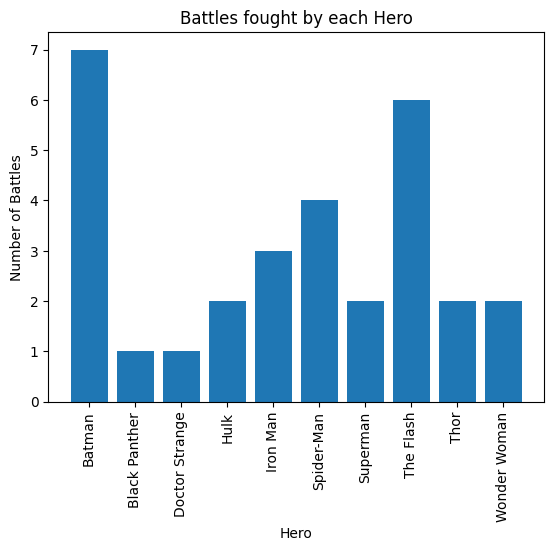

In [13]:
import matplotlib.pyplot as plt

# Fetch data for visualization
heroes_battles = pd.read_sql_query("""
    SELECT heroes.name, COUNT(battles.id) as num_battles
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    GROUP BY heroes.name;
""", conn)

# Bar chart of number of battles per hero
plt.bar(heroes_battles['name'], heroes_battles['num_battles'])
plt.title('Battles fought by each Hero')
plt.xlabel('Hero')
plt.ylabel('Number of Battles')
plt.xticks(rotation=90)
plt.show()